## Language Analysis - Creating function to check language

This implementation of language checking function, will be based solely on comparing popular word appearances in given language
to most popular words in given text

In [132]:
from time import sleep

import numpy as np
import matplotlib.pyplot as plt
import string
from wordfreq import top_n_list
import json
import classes.page as Page
from collections import Counter

In [96]:
# Simple implementation
def lang_confidence_score(word_counts ,top_language_words, k=None):

    if k:
        top_language_words = top_language_words[:k]
    matches = 0
    words = sum(word_counts.values())
    for word, count in word_counts.items():
        if word in top_language_words:
            matches += count
    if (matches == 0):
        return 0.0

    return matches / words


Looking for the biggest article

In [98]:
#Minecraft
nether_count = None
with open('word_counts_minecraft.json', 'r', encoding='utf-8') as f:
    d = json.load(f)
    print(f"minecraft= {sum(d.values())}")
with open('word_counts_crafting.json', 'r', encoding='utf-8') as f:
    d = json.load(f)
    print(f"crafting= {sum(d.values())}")
with open('word_counts_mob.json', 'r', encoding='utf-8') as f:
    d = json.load(f)
    print(f"mob= {sum(d.values())}")
with open('word_counts_nether.json', 'r', encoding='utf-8') as f:
    d = json.load(f)
    print(f"nether= {sum(d.values())}")
    nether_count = d


minecraft= 5512
crafting= 3288
mob= 5886
nether= 5918


We can see nether is one of the biggest article so we will use it

In [99]:
nether_count

{'this': 33,
 'article': 4,
 'is': 64,
 'about': 1,
 'the': 465,
 'dimension': 9,
 'for': 26,
 'update': 4,
 'see': 4,
 'nether': 276,
 'other': 13,
 'uses': 1,
 'disambiguation': 1,
 'a': 151,
 'view': 5,
 'of': 137,
 'crimson': 23,
 'forest': 22,
 'with': 38,
 'hoglin': 2,
 'ghast': 14,
 'and': 128,
 'three': 2,
 'piglins': 11,
 'in': 190,
 'background': 1,
 'vibrant': 1,
 'visuals': 1,
 'dangerous': 5,
 'volcanic': 2,
 'containing': 4,
 'fire': 16,
 'lava': 34,
 'fungal': 1,
 'vegetation': 1,
 'many': 4,
 'hostile': 2,
 'mobs': 17,
 'exclusive': 1,
 'structures': 16,
 'biomes': 25,
 'contents': 1,
 'accessing': 2,
 'traits': 2,
 'environment': 3,
 'biome': 32,
 'distribution': 3,
 'java': 18,
 'edition': 37,
 'generated': 16,
 'terrain': 14,
 'features': 10,
 'blocks': 40,
 'naturally': 17,
 'created': 9,
 'technical': 2,
 'information': 3,
 'id': 5,
 'folder': 4,
 'achievements': 2,
 'advancements': 2,
 'videos': 2,
 'history': 3,
 'bedrock': 22,
 'legacy': 4,
 'console': 4,
 'new'

In [100]:
lang_confidence_score(nether_count, top_eng)

0.5219668807029402

Now we will try to find word page with really small language confidence

In [105]:
start = Page.Page("Nether")
links = start.get_links()
results = []
for link in links:
    sleep(0.01)
    new_page = Page.Page(link)
    counter = new_page.get_counter()
    if counter and sum(counter.values()) > 100:
        conf = lang_confidence_score(counter, top_eng)
        results.append((conf, link, sum(counter.values())))


In [108]:
results.sort()
results[:5]

[(0.08954203691045796, '/w/Star', 2926),
 (0.10557061407608187, '/w/Bastion_Remnant', 21398),
 (0.10557061407608187, '/w/Bastion_Remnant#Loot', 21398),
 (0.10557061407608187, '/w/Bastion_remnant', 21398),
 (0.19096475260632137, '/w/Lunar_Base', 6043)]

We will choose star with language confidence as small as 0.08

For texts outside of wiki we will use Le Petit Prince book
by Antoine de Saint-Exupéry, which is one of the biggest clasics
in literature.
It is using somewhat easy language and is translated to many languages

In [123]:
def counter_from_txt(filename):
    with open(filename, 'r', encoding='utf-8') as f:
        text = f.read()
    to_del_signs = string.punctuation + string.digits + '×' + '–' + '⁄' + '—'
    for sign in to_del_signs:
        text = text.replace(sign, ' ').lower()
    words_list = text.split()
    return Counter(words_list)

In [130]:
k_vals = [3,10,100,1000]

counter_text_pl = counter_from_txt("LePetitPrince_PL")
counter_text_eng = counter_from_txt("LePetitPrince_ENG")
counter_text_ger = counter_from_txt("LePetitPrince_GER")
big = Page.Page('Nether')
inaccurate = Page.Page('star')
counter_big_page = big.get_counter()
counter_inaccurate = inaccurate.get_counter()

top_eng = top_n_list('en', 1000)
top_de = top_n_list('de', 1000)
top_pl = top_n_list('pl', 1000)

counters = [counter_big_page,
            counter_inaccurate,
            counter_text_pl,
            counter_text_eng,
            counter_text_ger]

texts_map = {
    "Wiki: Nether (Big)": counter_big_page,
    "Wiki: Star (Inaccurate)": counter_inaccurate,
    "Mały Książe": counter_text_pl,
    "The Little Prince": counter_text_eng,
    "Der Kleine Prinz": counter_text_ger
}

languages_map = {
    "English": top_eng,
    "German": top_de,
    "Polish": top_pl
}

results = {}

for k in k_vals:
    results[k] = {}
    for text_name, counter in texts_map.items():
        results[k][text_name] = {}
        for lang_name, top_words_list in languages_map.items():
            score = lang_confidence_score(counter, top_words_list, k=k)
            results[k][text_name][lang_name] = score


Przykładowe wyniki dla k=1000:
  Wiki: Nether (Big): EN=0.52, DE=0.24, PL=0.24
  Wiki: Star (Inaccurate): EN=0.09, DE=0.84, PL=0.04
  Mały Książe: EN=0.09, DE=0.14, PL=0.57
  The Little Prince: EN=0.79, DE=0.26, PL=0.27
  Der Kleine Prinz: EN=0.06, DE=0.64, PL=0.07


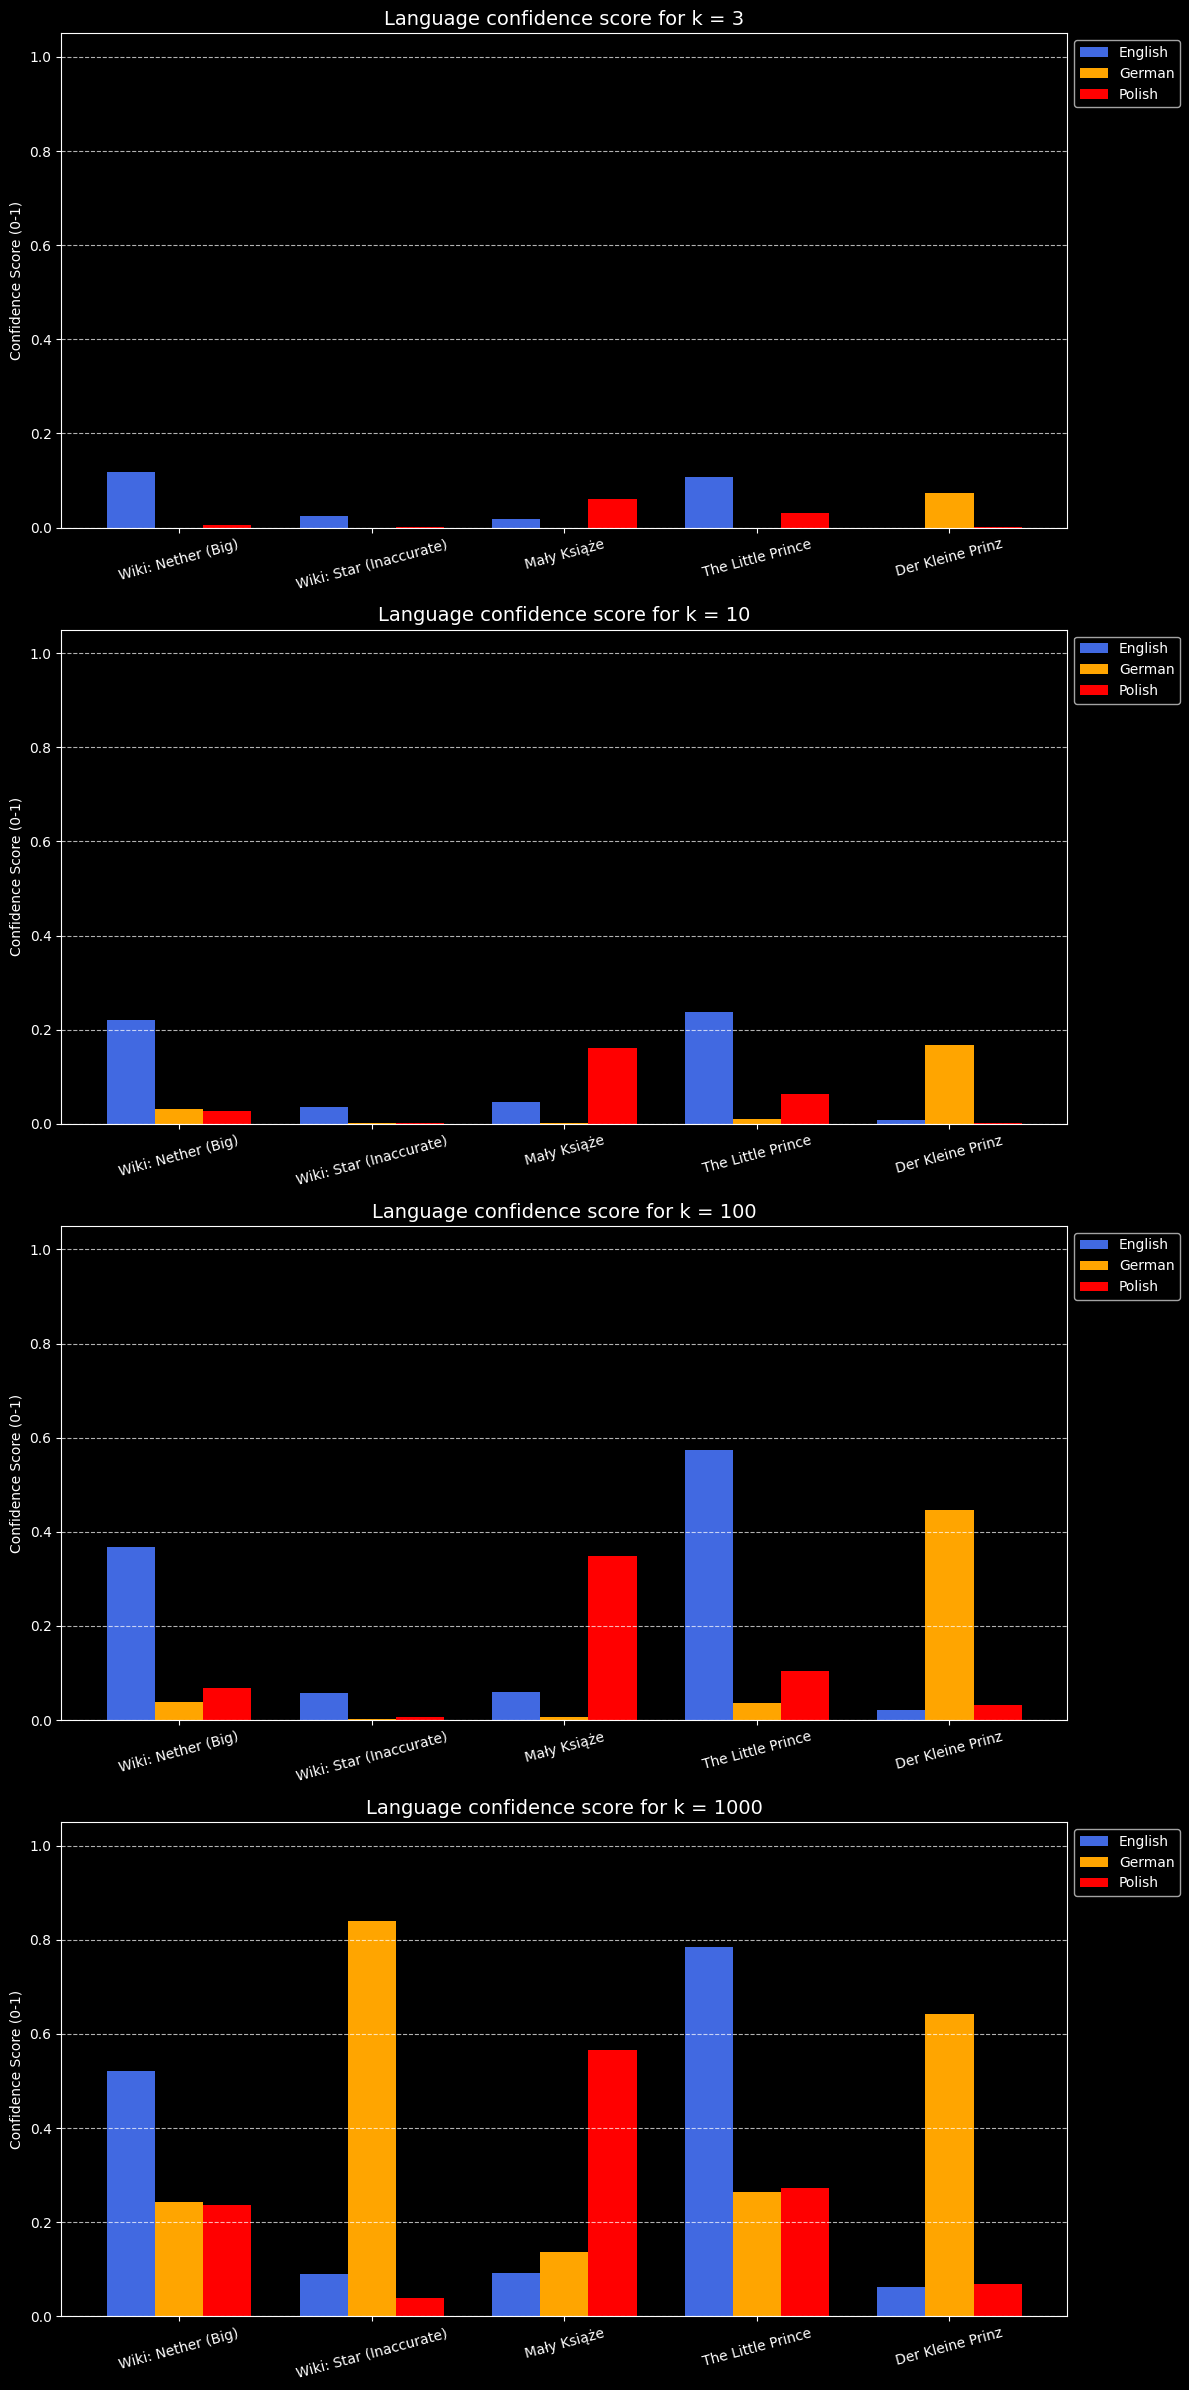

In [137]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 24))
axes = axes.flatten()

text_labels = list(texts_map.keys())
x = np.arange(len(text_labels))
width = 0.25

colors = {'English': 'royalblue', 'German': 'orange', 'Polish': 'red'}

for idx, k in enumerate(k_vals):
    ax = axes[idx]

    scores_en = [results[k][t]['English'] for t in text_labels]
    scores_de = [results[k][t]['German'] for t in text_labels]
    scores_pl = [results[k][t]['Polish'] for t in text_labels]


    rects1 = ax.bar(x - width, scores_en, width, label='English', color=colors['English'])
    rects2 = ax.bar(x, scores_de, width, label='German', color=colors['German'])
    rects3 = ax.bar(x + width, scores_pl, width, label='Polish', color=colors['Polish'])

    ax.set_title(f'Language confidence score for k = {k}', fontsize=14)
    ax.set_ylabel('Confidence Score (0-1)')
    ax.set_xticks(x)
    ax.set_xticklabels(text_labels, rotation=15)
    ax.set_ylim(0, 1.05)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

Looking at graphs above, we can see that besides one case everytime our algorithm evaluated the language correctly.

Another thing we can clearly see
is that increasing k factor we get stronger confidence of correct language, which is great, but confidence score also increases for the incorrect ones.

Ignoring wiki article about Star, wiki article has similar language scores as books.

Our inaccurate example does something very strange, for small k (3, 10, 100)
it gives correct language evaluation, but with very small confidence, but at k = 1000 score for german language skyrockets, and it has the biggest confidence from all tests having a wrong answer.

In conclusion our algorithm is accurate for most of the cases, but fails miserably with false posistive case of the article about star.

## Did the choice of language matter?
We chose similar latin alphabet languages, but we can already see the difference between those 3, English is the easiest one with no special characters and not so many word variations in comparison to Polish, which has a lot of them and german somewhere in the middle. We can see that English has the highest confidence scores, German smaller ones and Polish the smallest in my opinion because of number of word variations

## Do the values show that words are often inflected in the chosen language?
Yes, this is very clear. Even though we analyzed the same book (The Little Prince), the score for English (approx. 0.79) was much higher than for Polish (approx. 0.57). This difference happens because Polish words change endings (e.g., dom, domu, domem), but the top-words list only contains the basic form. Therefore, the program "misses" the inflected words.

## Was it difficult to find an article with the lowest possible score?
No, I just searched subarticles from the biggest page and found star with confidence below 0.1 which I found to be very low, with averago of 0.5-0.6 on the other pages